In [287]:
### Read training data
#! Perhaps you need to set the working directory!?
#setwd("/home/pbac/g/course02417/2025/assignment1")
D <- read.csv("DST_BIL54.csv")
str(D)

# See the help
?strftime
D$time <- as.POSIXct(paste0(D$time,"-01"), "%Y-%m-%d", tz="UTC")


## Year to month for each of them
D$year <- 1900 + as.POSIXlt(D$time)$year + as.POSIXlt(D$time)$mon / 12

## Make the output variable a floating point (i.e.\ decimal number)
D$total <- as.numeric(D$total) / 1E6

## Divide intro train and test set
teststart <- as.POSIXct("2024-01-01", tz="UTC")
Dtrain <- D[D$time < teststart, ]
Dtest <- D[D$time >= teststart, ]



'data.frame':	84 obs. of  13 variables:
 $ time        : chr  "2018-01" "2018-02" "2018-03" "2018-04" ...
 $ total       : int  2930483 2934044 2941422 2951498 2963093 2973721 2976096 2985537 2983209 2982473 ...
 $ gasoline    : int  1781826 1783338 1787219 1793554 1799795 1805170 1806338 1810615 1808496 1806710 ...
 $ diesel      : int  1136656 1138414 1141576 1144846 1149840 1154651 1155420 1159907 1159418 1160162 ...
 $ fgas        : int  12 12 12 12 12 12 12 12 11 11 ...
 $ ngas        : int  256 255 257 257 256 262 262 261 261 263 ...
 $ electricity : int  9304 9343 9399 9548 9665 9807 9853 10002 10120 10236 ...
 $ petroleum   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hydrogen    : int  81 80 77 77 77 77 77 80 82 82 ...
 $ methanol    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ethanol     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pluginhybrid: int  2340 2593 2873 3195 3439 3734 4126 4652 4812 5000 ...
 $ otherfuels  : int  8 9 9 9 9 8 8 8 9 9 ...


strptime                 package:base                  R Documentation

_D_a_t_e-_t_i_m_e _C_o_n_v_e_r_s_i_o_n _F_u_n_c_t_i_o_n_s _t_o _a_n_d _f_r_o_m _C_h_a_r_a_c_t_e_r

_D_e_s_c_r_i_p_t_i_o_n:

     Functions to convert between character representations and objects
     of classes ‘"POSIXlt"’ and ‘"POSIXct"’ representing calendar dates
     and times.

_U_s_a_g_e:

     ## S3 method for class 'POSIXct'
     format(x, format = "", tz = "", usetz = FALSE, ...)
     ## S3 method for class 'POSIXlt'
     format(x, format = "", usetz = FALSE,
            digits = getOption("digits.secs"), ...)
     
     ## S3 method for class 'POSIXt'
     as.character(x, digits = if(inherits(x, "POSIXlt")) 14L else 6L,
                  OutDec = ".", ...)
     
     strftime(x, format = "", tz = "", usetz = FALSE, ...)
     strptime(x, format, tz = "")
     
_A_r_g_u_m_e_n_t_s:

       x: an object to be converted: a character vector 

In [288]:
head(Dtrain)

,time,total,gasoline,diesel,fgas,ngas,electricity,petroleum,hydrogen,methanol,ethanol,pluginhybrid,otherfuels,year
,<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2018-01-01,2.930483,1781826,1136656,12,256,9304,0,81,0,0,2340,8,2018.000
2,2018-02-01,2.934044,1783338,1138414,12,255,9343,0,80,0,0,2593,9,2018.083
3,2018-03-01,2.941422,1787219,1141576,12,257,9399,0,77,0,0,2873,9,2018.167
4,2018-04-01,2.951498,1793554,1144846,12,257,9548,0,77,0,0,3195,9,2018.250
5,2018-05-01,2.963093,1799795,1149840,12,256,9665,0,77,0,0,3439,9,2018.333
6,2018-06-01,2.973721,1805170,1154651,12,262,9807,0,77,0,0,3734,8,2018.417


In [289]:
library(ggplot2)

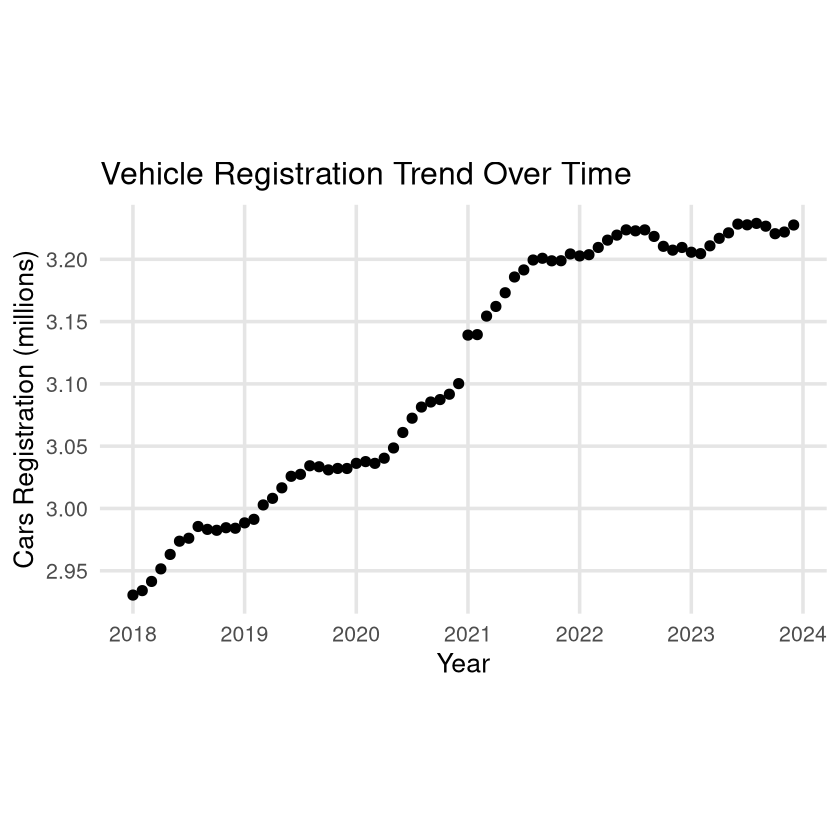

In [290]:
ggplot(data = Dtrain, aes(x = year, y = total)) +
  geom_point() +
  # 1. Increase the number of axis breaks (more grid lines)
  scale_x_continuous(breaks = seq(min(D$year), max(D$year), by = 1)) + 
  scale_y_continuous(n.breaks = 10) + 
  
  # 2. Set the 16/9 aspect ratio and increase base font size
  theme_minimal(base_size = 16) + 
  theme(
    aspect.ratio = 9/16,
    panel.grid.major = element_line(color = "gray90", size = 1),
    panel.grid.minor = element_blank()
  ) + labs(
    x = "Year", 
    y = "Cars Registration (millions)",
    title = "Vehicle Registration Trend Over Time"
  )

In [291]:
# Save as a large, high-res 16x9 image
ggsave("plot.png", width = 16, height = 9, dpi = 300)

In [292]:
library(dplyr)
library(ggplot2)

# Calculate the difference between years
D_diff <- Dtrain %>%
  arrange(year) %>% # Ensure years are in order
  mutate(diff_total = total - lag(total))

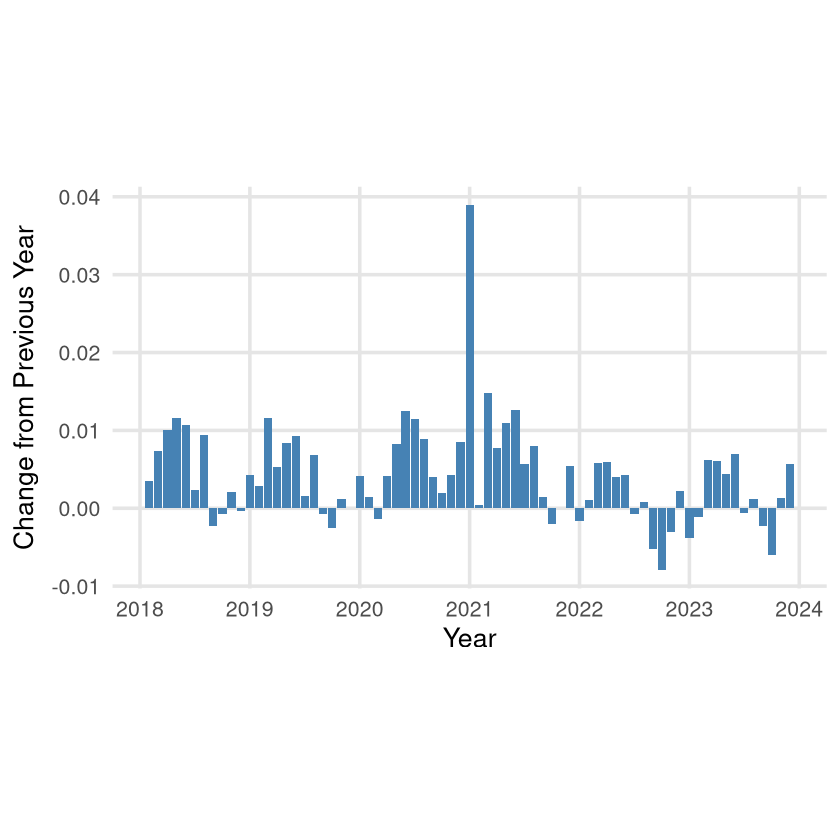

In [293]:
ggplot(data = subset(D_diff, !is.na(diff_total)), aes(x = year, y = diff_total)) +
  geom_col(fill = "steelblue") + 
  # Set the 16/9 aspect ratio
  theme_minimal(base_size = 16) +
  theme(
    aspect.ratio = 9/16,
    panel.grid.major = element_line(color = "gray90", size = 1),
    panel.grid.minor = element_blank()
  ) +
  # Labeling
  labs(y = "Change from Previous Year", x = "Year") +
  scale_x_continuous(breaks = seq(min(D$year), max(D$year), by = 1))

`geom_smooth()` using formula = 'y ~ x'


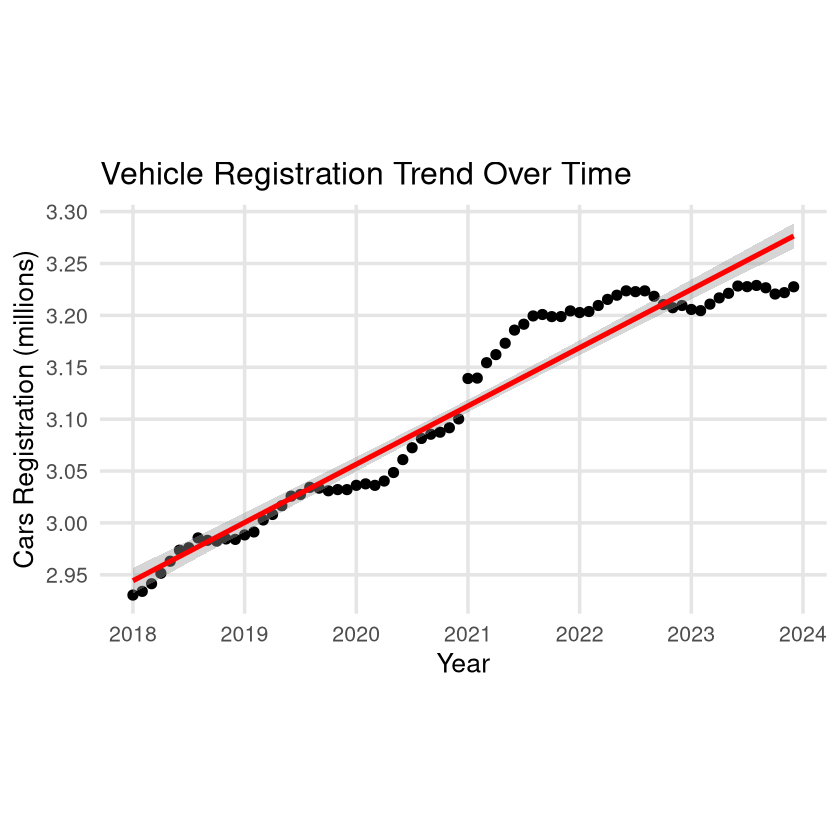

In [294]:
ggplot(data = Dtrain, aes(x = year, y = total)) +
  geom_point() +
  # 1. Increase the number of axis breaks (more grid lines)
  scale_x_continuous(breaks = seq(min(D$year), max(D$year), by = 1)) + 
  scale_y_continuous(n.breaks = 10) + 
  
  # 2. Set the 16/9 aspect ratio and increase base font size
  theme_minimal(base_size = 16) + 
  theme(
    aspect.ratio = 9/16,
    panel.grid.major = element_line(color = "gray90", size = 1),
    panel.grid.minor = element_blank()
  ) + labs(
    x = "Year", 
    y = "Cars Registration (millions)",
    title = "Vehicle Registration Trend Over Time"
  ) + geom_smooth(method = "lm", color = "red", se = TRUE)

In [295]:
model = lm(total~year, data = Dtrain)
summary(model)


Call:
lm(formula = total ~ year, data = Dtrain)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049876 -0.019062 -0.006889  0.023099  0.053979 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.104e+02  3.594e+00  -30.71   <2e-16 ***
year         5.615e-02  1.778e-03   31.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02613 on 70 degrees of freedom
Multiple R-squared:  0.9344,	Adjusted R-squared:  0.9335 
F-statistic:   997 on 1 and 70 DF,  p-value: < 2.2e-16


In [342]:
# Extract coefficients
theta_estimates <- coef(model)

# Rename for clarity
theta_0 <- theta_estimates[1] # Intercept
theta_1 <- theta_estimates[2] # Slope (Effect of Year)

print(theta_0)
print(theta_1)

(Intercept) 
  -110.3554 
      year 
0.05614456 


In [340]:
model_summary = summary(model)

se_values <- model_summary$coefficients[, "Std. Error"]
se_theta0 <- se_values[1]
se_theta1 <- se_values[2]
print(se_theta0)
print(se_theta1)


(Intercept) 
   3.593581 
       year 
0.001778156 


In [341]:
predicted_data = predict(model,newdata = data.frame(year = Dtest$year),interval = "prediction", 
                 level = 0.95)

In [299]:
predicted_dt_ols <- data.frame(
  year = Dtest$year,
  fit  = predicted_data[, "fit"],
  lwr  = predicted_data[, "lwr"],
  upr  = predicted_data[, "upr"]
)

In [300]:
View(predicted_dt_ols)

,year,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024.000,3.281154,3.227579,3.334728
2,2024.083,3.285832,3.232198,3.339467
3,2024.167,3.290511,3.236815,3.344208
4,2024.250,3.295190,3.241430,3.348950
5,2024.333,3.299869,3.246044,3.353693
6,2024.417,3.304547,3.250656,3.358439
7,2024.500,3.309226,3.255267,3.363185
8,2024.583,3.313905,3.259876,3.367934
9,2024.667,3.318583,3.264483,3.372683


`geom_smooth()` using formula = 'y ~ x'


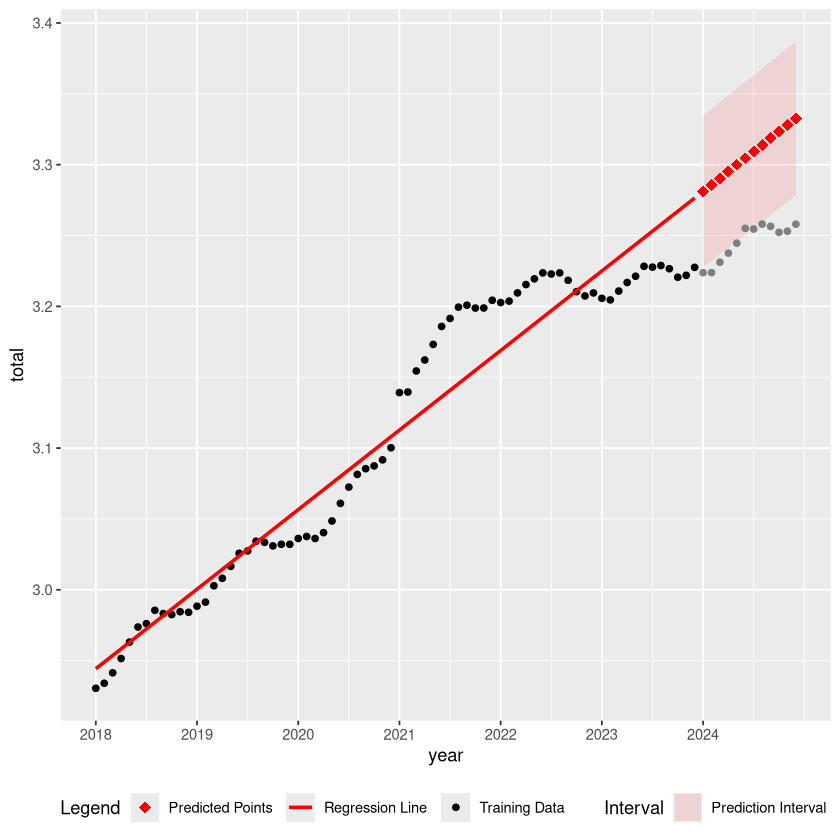

In [301]:
ggplot() +
  # 1. The Prediction Interval
  geom_ribbon(data = predicted_dt_ols, 
              aes(x = year, ymin = lwr, ymax = upr, fill = "Prediction Interval"), 
              alpha = 0.1) +
  
  # 2. The Training Data (Map 'color' to a string label)
  geom_point(data = Dtrain, aes(x = year, y = total, color = "Training Data")) +
  
  # 3. The Regression Line
  geom_smooth(method = "lm", data = Dtrain, aes(x = year, y = total, color = "Regression Line"), 
              linewidth = 1, se = FALSE) +

  # 4. The Predicted Points (Map 'shape' or 'color' to a string label)
  geom_point(data = predicted_dt_ols, aes(x = year, y = fit, color = "Predicted Points"),
             size = 3, shape = 18) +
  
  geom_point(data = Dtest, aes(x = year, y = total, color = "Test Data")) +
  # 5. Define the colors manually
  scale_color_manual(name = "Legend", values = c(
    "Training Data" = "black",
    "Regression Line" = "red",
    "Predicted Points" = "red"
  )) +
  scale_fill_manual(name = "Interval", values = c("Prediction Interval" = "red")) +
  
  scale_x_continuous(breaks = seq(min(D$year), max(D$year), by = 1)) +
  theme(legend.position = "bottom")

In [302]:
library(ggfortify)

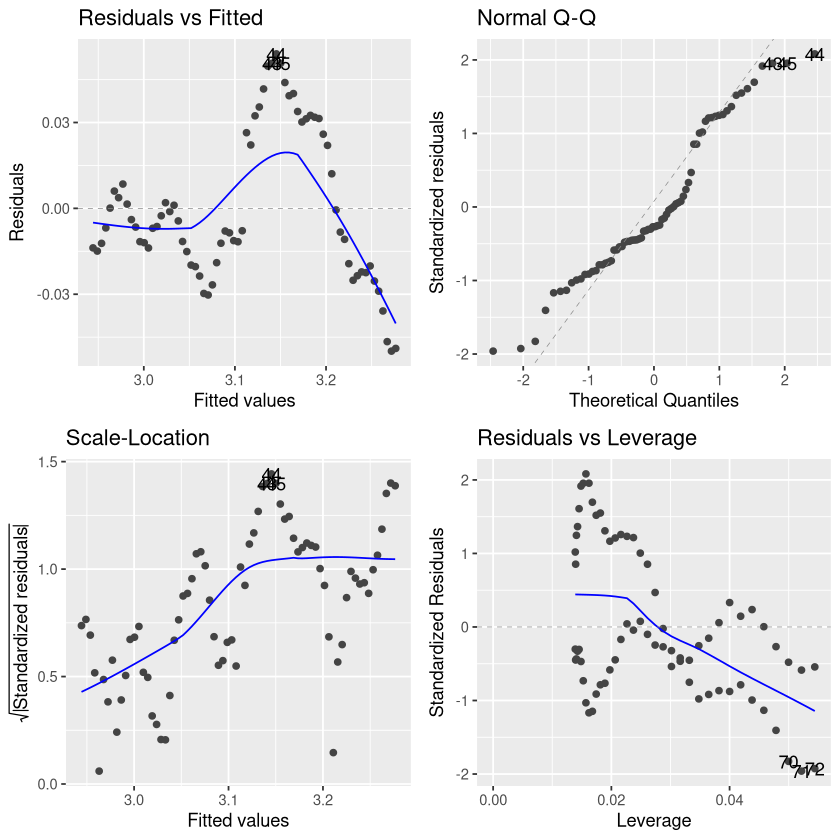

In [303]:
autoplot(model)


In [304]:
Dtrain$resids <- residuals(model)

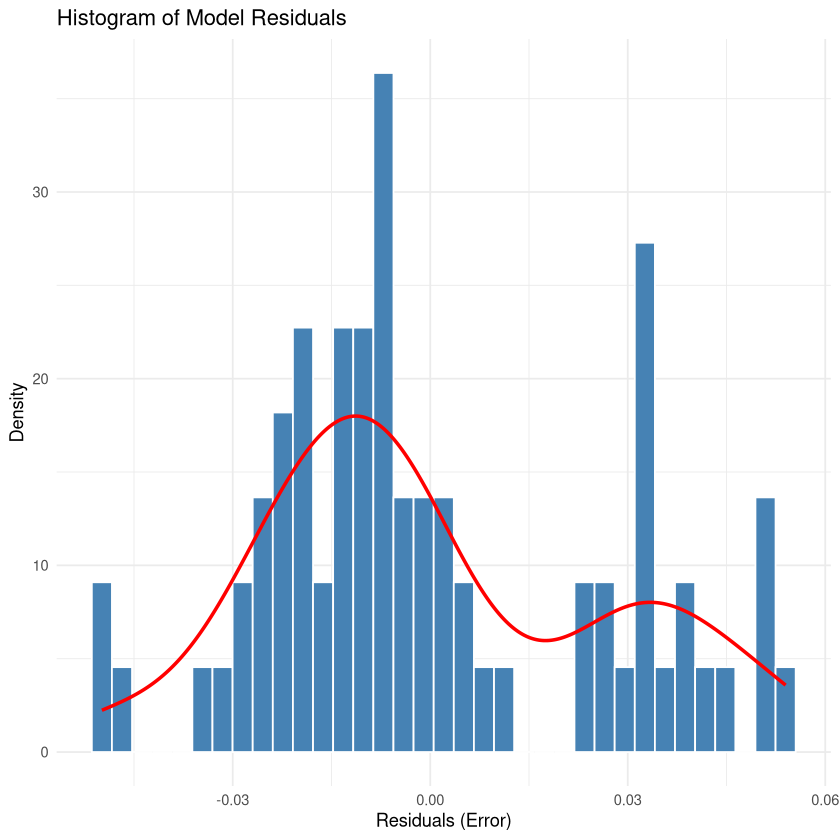

In [305]:


ggplot(Dtrain, aes(x = resids)) +
  geom_histogram(aes(y = ..density..), bins = 35, fill = "steelblue", color = "white") +
  geom_density(color = "red", linewidth = 1) +
  labs(title = "Histogram of Model Residuals",
       x = "Residuals (Error)",
       y = "Density") +
  theme_minimal()

In [306]:
# 1. Define your parameters
lambda <- 0.9         # Example decay rate
n <- nrow(Dtrain)         # The size of your input data

# 2. Create the vector of exponents (from n-1 down to 0)
# We use n-1 because lambda^0 = 1 (your final value)
exponents <- (n-1):0

# 3. Calculate the weights
weights <- lambda^exponents

# Preview the first few
head(weights)
sum(weights)

[1] 0.0005639209 0.0006265787 0.0006961986 0.0007735540 0.0008595045
[6] 0.0009550050

[1] 9.994925

In [307]:
weighted_model <- lm(total ~ year, data = Dtrain, weights = weights)

summary(weighted_model)


Call:
lm(formula = total ~ year, data = Dtrain, weights = weights)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.010578 -0.005945 -0.003530  0.003043  0.011459 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.482862   5.130965  -10.23 1.55e-15 ***
year          0.027530   0.002536   10.86  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006245 on 70 degrees of freedom
Multiple R-squared:  0.6273,	Adjusted R-squared:  0.622 
F-statistic: 117.8 on 1 and 70 DF,  p-value: < 2.2e-16


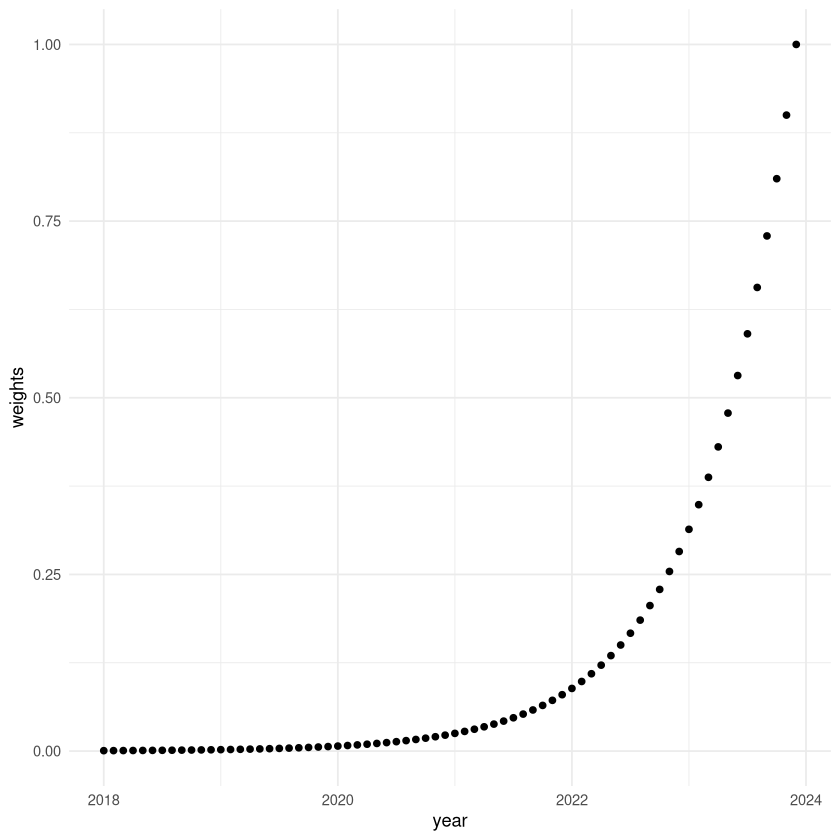

In [308]:
ggplot() +
geom_point(data = Dtrain, aes(x = year, y = weights)) +
theme_minimal()

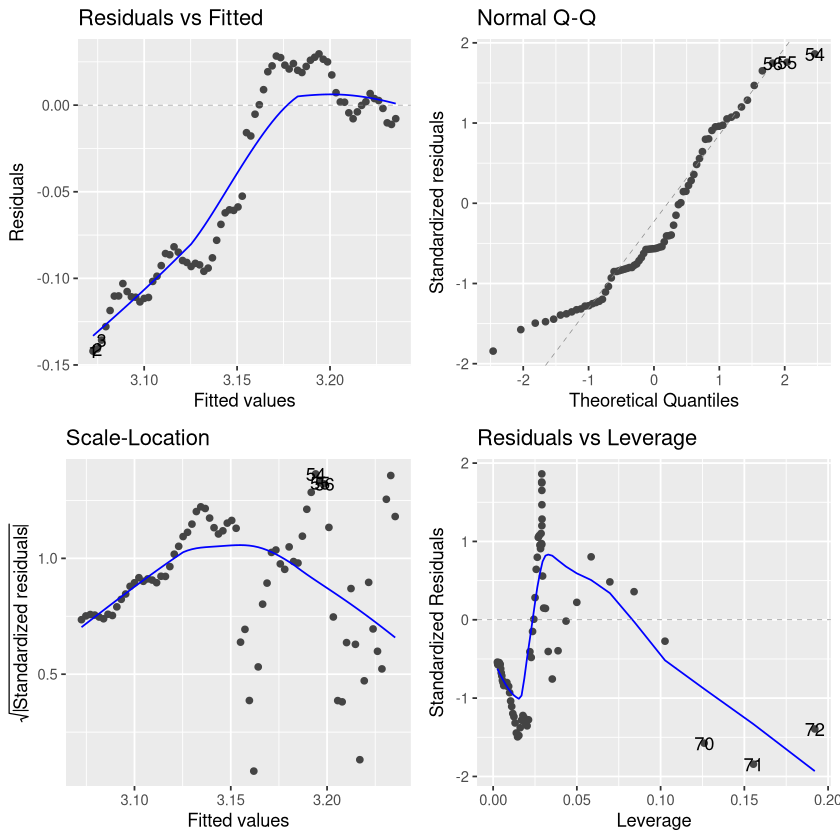

In [309]:
autoplot(weighted_model)

In [310]:
Dtrain$resids <- residuals(weighted_model)

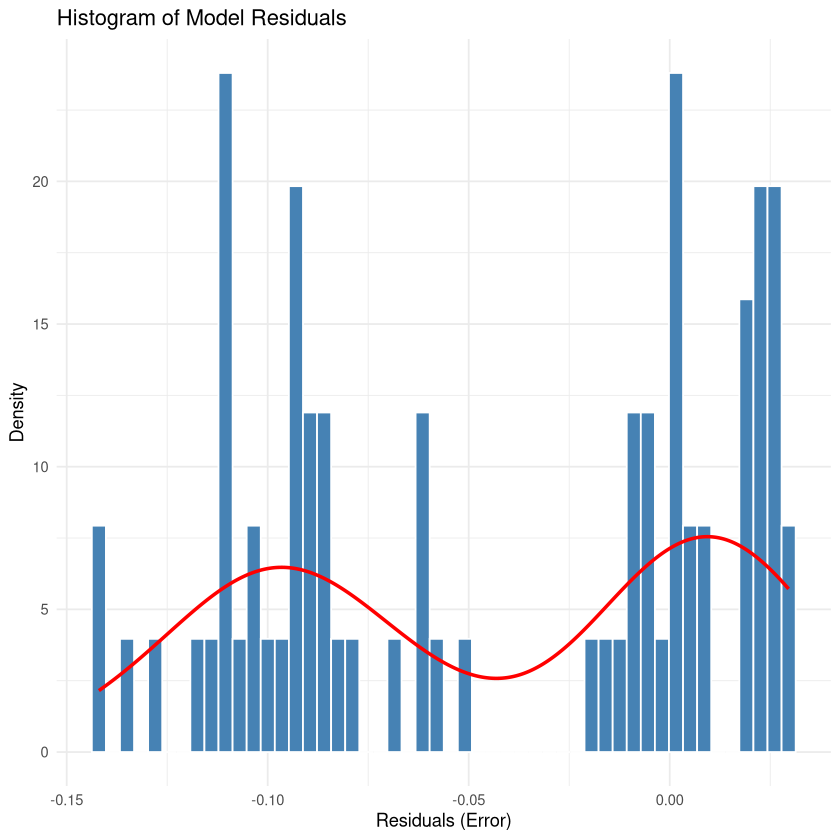

In [311]:
ggplot(Dtrain, aes(x = resids)) +
  geom_histogram(aes(y = ..density..), bins = 50, fill = "steelblue", color = "white") +
  geom_density(color = "red", linewidth = 1) +
  labs(title = "Histogram of Model Residuals",
       x = "Residuals (Error)",
       y = "Density") +
  theme_minimal()

In [312]:
predicted_data = predict(weighted_model,newdata = data.frame(year = Dtest$year),interval = "prediction", 
                 level = 0.95)

Warning message in predict.lm(weighted_model, newdata = data.frame(year = Dtest$year), :
“Assuming constant prediction variance even though model fit is weighted
”


In [313]:
predicted_dt <- data.frame(
  year = Dtest$year,
  fit  = predicted_data[, "fit"],
  lwr  = predicted_data[, "lwr"],
  upr  = predicted_data[, "upr"]
)

In [314]:
View(predicted_dt)
Dtrain$wls_fit <- predict(weighted_model)

,year,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024.000,3.237659,3.223937,3.251381
2,2024.083,3.239953,3.226096,3.253810
3,2024.167,3.242247,3.228244,3.256251
4,2024.250,3.244541,3.230381,3.258702
5,2024.333,3.246836,3.232507,3.261164
6,2024.417,3.249130,3.234623,3.263637
7,2024.500,3.251424,3.236729,3.266119
8,2024.583,3.253718,3.238825,3.268611
9,2024.667,3.256012,3.240913,3.271112


In [315]:
summary(weighted_model)


Call:
lm(formula = total ~ year, data = Dtrain, weights = weights)

Weighted Residuals:
      Min        1Q    Median        3Q       Max 
-0.010578 -0.005945 -0.003530  0.003043  0.011459 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.482862   5.130965  -10.23 1.55e-15 ***
year          0.027530   0.002536   10.86  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006245 on 70 degrees of freedom
Multiple R-squared:  0.6273,	Adjusted R-squared:  0.622 
F-statistic: 117.8 on 1 and 70 DF,  p-value: < 2.2e-16


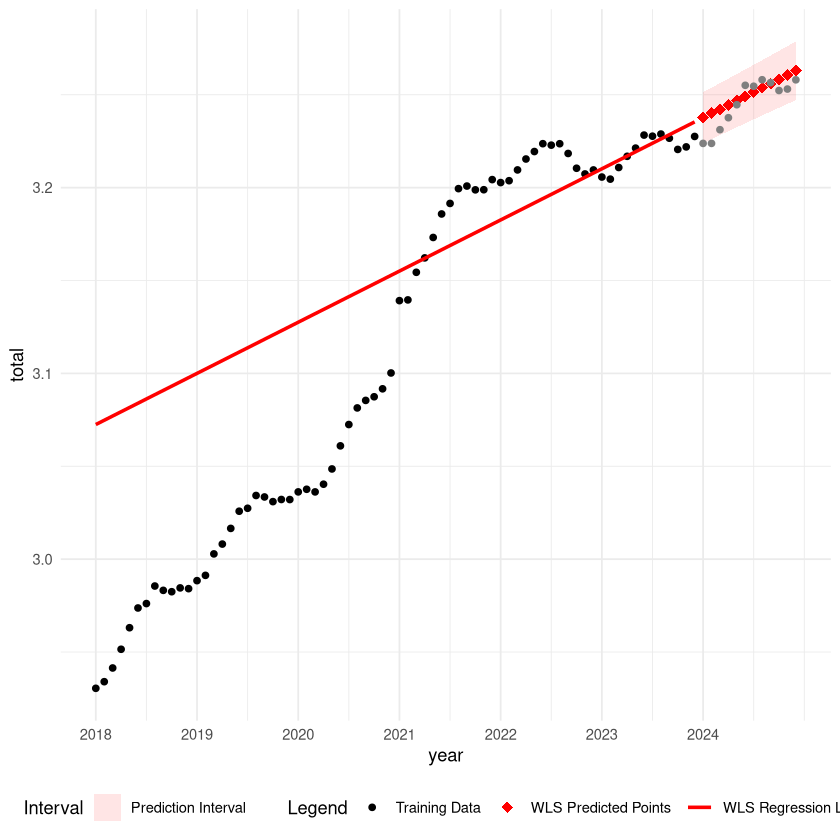

In [316]:
ggplot() +
  # 1. The WLS Prediction Interval (Future)
  geom_ribbon(data = predicted_dt, 
              aes(x = year, ymin = lwr, ymax = upr, fill = "Prediction Interval"), 
              alpha = 0.1) +
  
  # 2. The Training Data
  # Tip: Map 'size' to weights to visually show the WLS influence!
  geom_point(data = Dtrain, aes(x = year, y = total, color = "Training Data")) +
  
  # 3. The WLS Regression Line (Actual model fit)
  geom_line(data = Dtrain, aes(x = year, y = wls_fit, color = "WLS Regression Line"), 
            linewidth = 1) +

  # 4. The Predicted Points (Future)
  geom_point(data = predicted_dt, aes(x = year, y = fit, color = "WLS Predicted Points"),
             size = 3, shape = 18) +
  
  # 5. Manual Scales
  scale_color_manual(name = "Legend", values = c(
    "Training Data" = "black",
    "WLS Regression Line" = "red",
    "WLS Predicted Points" = "red"
  )) +
  scale_fill_manual(name = "Interval", values = c("Prediction Interval" = "red")) +
  scale_size_continuous(guide = "none") + # Hides the size legend if it's too cluttered
   geom_point(data = Dtest, aes(x = year, y = total, color = "Test Data")) +
  scale_x_continuous(breaks = seq(min(Dtrain$year), max(predicted_dt$year), by = 1)) +
  theme_minimal() +
  theme(legend.position = "bottom")

In [317]:
sum(Dtrain$year*Dtrain$year)

[1] 294067842

In [318]:
Dtrain$ols_fit <- predict(model)

# Assuming you want OLS prediction intervals too (optional, but good for comparison)
ols_pred <- predict(model, newdata = Dtest, interval = "prediction")
predicted_dt$ols_fit <- ols_pred[, "fit"]

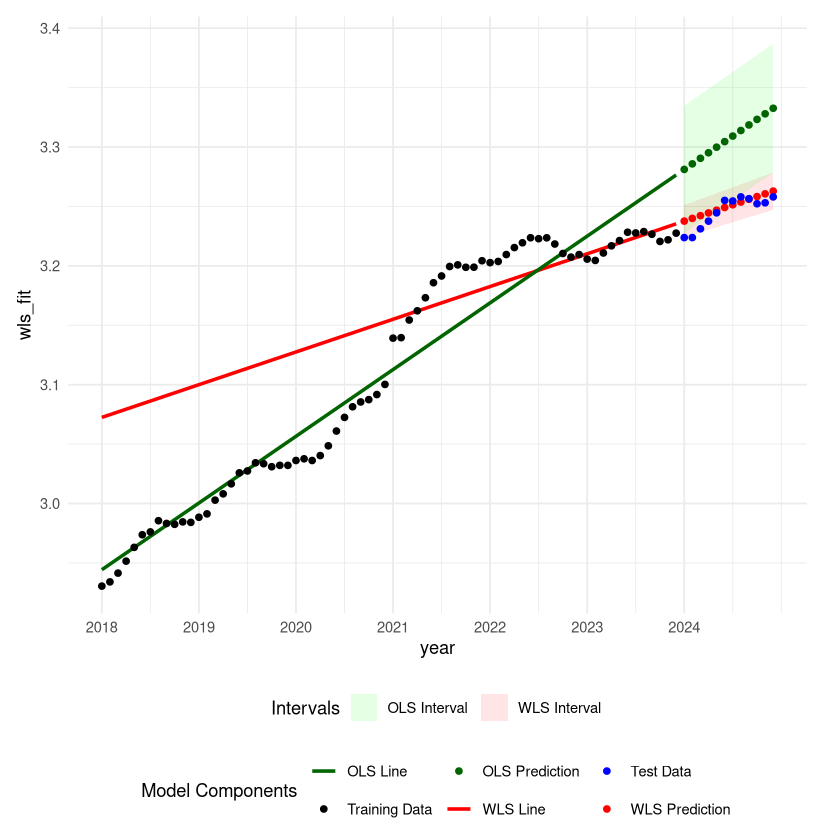

In [319]:
ggplot() +
  # --- WLS Layers ---
  geom_ribbon(data = predicted_dt,
              aes(x = year, ymin = lwr, ymax = upr, fill = "WLS Interval"), 
              alpha = 0.1) +
 geom_ribbon(data = predicted_dt_ols,
              aes(x = year, ymin = lwr, ymax = upr, fill = "OLS Interval"), 
              alpha = 0.1,) +              
  geom_line(data = Dtrain, aes(x = year, y = wls_fit, color = "WLS Line"), linewidth = 1) +
  geom_point(data = predicted_dt, aes(x = year, y = fit, color = "WLS Prediction")) +
  
  # --- OLS Layers ---
  geom_line(data = Dtrain, aes(x = year, y = ols_fit, color = "OLS Line"), linewidth = 1) +
  geom_point(data = predicted_dt, aes(x = year, y = ols_fit, color = "OLS Prediction")) +
  
  # --- Data Points ---
  geom_point(data = Dtrain, aes(x = year, y = total, color = "Training Data")) +
  geom_point(data = Dtest, aes(x = year, y = total, color = "Test Data")) +
  
  # --- Scales & Legend Formatting ---
  scale_color_manual(name = "Model Components", values = c(
    "Training Data" = "black",
    "Test Data" = "blue",
    "WLS Line" = "red",
    "WLS Prediction" = "red",
    "OLS Line" = "darkgreen",
    "OLS Prediction" = "darkgreen"
  )) +
  scale_fill_manual(name = "Intervals", values = c("WLS Interval" = "red","OLS Interval" = "green")) +
  
  # --- Layout Adjustments ---
  scale_x_continuous(breaks = seq(min(Dtrain$year), max(predicted_dt$year), by = 1)) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    legend.box = "vertical",           # Stacks Color and Fill legends
    legend.margin = margin(t = 10),    # Adds space above the legend
    plot.margin = margin(10, 20, 10, 10) # Gives the right side some breathing room
  ) +
  guides(color = guide_legend(nrow = 2, byrow = TRUE)) # Wraps legend into 2 rows

## Exercise 5.2
Three interation with the formula as-is

In [337]:
theta = matrix(c(0,0), nrow=2, ncol=1)
r = matrix(c(0.1,0,0,0.1), nrow = 2, ncol = 2)

x_vec <- Dtrain$year
y_vec <- Dtrain$total

for (i in seq_along(Dtrain$year)){
  if (i > 3) {
    break()
  }
  x <- matrix(c(1, x_vec[i]), nrow = 2, ncol = 1)
  r <- r + (x %*% t(x))
  error <- y_vec[i] - as.numeric(t(x) %*% theta)
  theta <- theta + (solve(r) %*% x * error)
  print(theta)
}

             [,1]
[1,] 7.196093e-07
[2,] 1.452172e-03
             [,1]
[1,] 9.775061e-09
[2,] 1.453024e-03
              [,1]
[1,] -3.696235e-06
[2,]  1.454509e-03


There is one issue tho: because the year si a 4 digit number, after some iterations it might overflow.
We need to "normalise / center the data" around the mean in order to make computations correctly. Then we will shift back final result by the mean. Without this the values will be very far off the actual correct values. To test remove `-year_mean` from the code below

In [336]:
theta = matrix(c(0,0), nrow=2, ncol=1)
r = matrix(c(0.1,0,0,0.1), nrow = 2, ncol = 2)


year_mean <- mean(Dtrain$year)
x_vec <- Dtrain$year - year_mean
y_vec <- Dtrain$total

for (i in seq_along(Dtrain$year)){
  x <- matrix(c(1, x_vec[i]), nrow = 2, ncol = 1)
  r <- r + (x %*% t(x))
  error <- y_vec[i] - as.numeric(t(x) %*% theta)
  theta <- theta + (solve(r) %*% x * error)
  
}


final_slope <- theta[2,1]
final_intercept <- theta[1,1] - (final_slope * year_mean)

print(paste("RLS Intercept:", final_intercept))
print(paste("RLS Slope:", final_slope))

[1] "RLS Intercept: -110.307225824251"
[1] "RLS Slope: 0.0561185704092265"


In [343]:
print(theta_estimates)

  (Intercept)          year 
-110.35542813    0.05614456 


## RLS with forgetting

In [ ]:
theta_df_1 <- data.frame(time=c(),theta_0 = c(), theta_1 = c())
lambda <- 0.7

In [ ]:
theta = matrix(c(0,0), nrow=2, ncol=1)
r = matrix(c(0.1,0,0,0.1), nrow = 2, ncol = 2)


year_mean <- mean(Dtrain$year)
x_vec <- Dtrain$year - year_mean
y_vec <- Dtrain$total
for (i in seq_along(Dtrain$year)){
  x <- matrix(c(1, x_vec[i]), nrow = 2, ncol = 1)
  r <- lambda*r + (x %*% t(x))
  error <- y_vec[i] - as.numeric(t(x) %*% theta)
  theta <- theta + (solve(r) %*% x * error)
  rbind(theta_df_1,c(i,theta[2,1],theta[1,1]))
}

final_slope <- theta[2,1]
final_intercept <- theta[1,1] - (final_slope * year_mean)

print(paste("RLS Intercept:", final_intercept))
print(paste("RLS Slope:", final_slope))

[1] "RLS Intercept: -15.7399785087981"
[1] "RLS Slope: 0.00937098192233705"


In [ ]:
theta_df_2 <- data.frame(time=c(),theta_0 = c(), theta_1 = c())
lambda <- 0.99

In [ ]:
theta = matrix(c(0,0), nrow=2, ncol=1)
r = matrix(c(0.1,0,0,0.1), nrow = 2, ncol = 2)


year_mean <- mean(Dtrain$year)
x_vec <- Dtrain$year - year_mean
y_vec <- Dtrain$total
for (i in seq_along(Dtrain$year)){
  x <- matrix(c(1, x_vec[i]), nrow = 2, ncol = 1)
  r <- lambda*r + (x %*% t(x))
  error <- y_vec[i] - as.numeric(t(x) %*% theta)
  theta <- theta + (solve(r) %*% x * error)
  rbind(theta_df_2,c(i,theta[2,1],theta[1,1]))
}

final_slope <- theta[2,1]
final_intercept <- theta[1,1] - (final_slope * year_mean)

print(paste("RLS Intercept:", final_intercept))
print(paste("RLS Slope:", final_slope))

[1] "RLS Intercept: -107.79126239079"
[1] "RLS Slope: 0.0548744088262485"


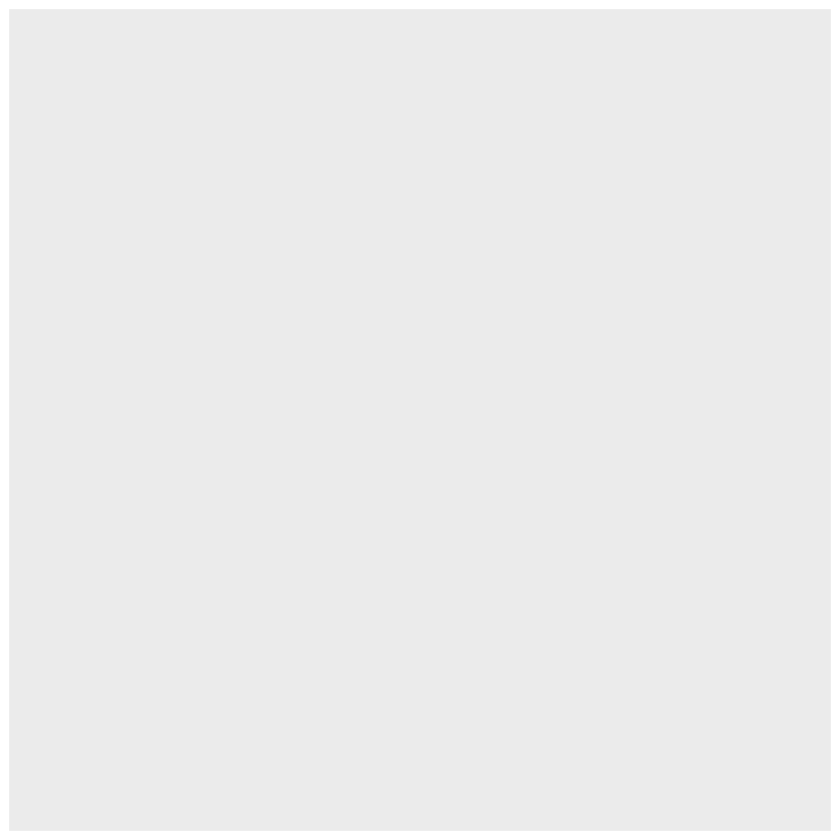

In [352]:
ggplot() +
geom_point(data=theta_df_1,x=theta_0,y=1:length(theta_0))